In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import plotly.express as px
# import plotly.io as pio
# template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/df_preprocessed.csv")
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2012,8,4,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,N,Spain,H,27,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,0.0,1
606653,N,Spain,H,56,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,0,2013,9,2,1.0,1
606654,N,Spain,V,39,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1
606655,N,Spain,V,36,0.0,22,1.0,1.0,A,1,...,0,0,0.0,0.0,1,2013,9,2,1.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [4]:
import pickle
col_transformer = pickle.load(open('col_transformer.pkl', 'rb'))

In [5]:
df.columns

Index(['emp_index', 'cust_residence', 'cust_gender', 'age', 'new_cust_index',
       'cust_seniority', 'indrel', 'cust_type', 'cust_rel_time',
       'cust_res_index', 'is_foreign', 'channel_to_join', 'deceased_index',
       'name_province', 'activity_index', 'household_income', 'saving_acc',
       'guarantees', 'current_acc', 'derivada_acc', 'payroll_acc',
       'junior_acc', 'mass_particular_acc', 'particular_acc',
       'particular_plus_acc', 'short_term_deposit', 'medium_term_deposits',
       'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions1',
       'loans', 'taxes', 'credit_card', 'securities', 'home_account',
       'payroll', 'pensions2', 'direct_debit', 'first_holder_date_year',
       'first_holder_date_month', 'first_holder_date_day', 'total_accounts',
       'dup_rows_count'],
      dtype='object')

# Method 1
Do PCA taking only the first 3 components and then kmeans.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

transformer

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('onehotencoder-1',
                                  OneHotEncoder(top_categories=4,
                                                variables=['emp_index'])),
                                 ('onehotencoder-2',
                                  OneHotEncoder(variables=['cust_gender',
                                                           'cust_rel_time',
                                                           'cust_residence'])),
                                 ('countfrequencyencoder',
                                  CountFrequencyEncoder(encoding_method='frequency',
                                                        variables=['name_province',
                                                                   'channel_to_join']))])),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
           

In [7]:
%%time
arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))
arr

Wall time: 13.6 s


array([[ 4.69312183,  9.35206695, -6.17290551],
       [-9.6696284 , -8.08448292,  0.09279859],
       [-9.57840961, -8.12439338,  0.08141896],
       ...,
       [12.47910159, -4.42894441,  6.2350975 ],
       [ 9.67534716, -4.62536322, -3.34968638],
       [ 6.75391679,  9.69904997, -3.23409637]])

In [8]:
new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

new_df

,PC1,PC2,PC3
0,4.693122,9.352067,-6.172906
1,-9.669628,-8.084483,0.092799
2,-9.578410,-8.124393,0.081419
3,-9.734131,6.040841,6.886277
4,6.238325,-4.896521,-6.974035
...,...,...,...
606652,8.318310,9.663925,2.830572
606653,4.527971,9.308131,-6.058344
606654,12.479102,-4.428944,6.235098
606655,9.675347,-4.625363,-3.349686


Total Variance Ratio: 58.759 %


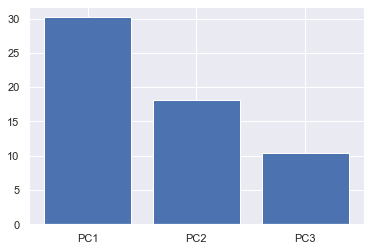

In [9]:
print(f"Total Variance Ratio: {np.sum(transformer.named_steps.pca.explained_variance_ratio_)* 100:.3f} %")

per_var = np.round(transformer.named_steps.pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels);

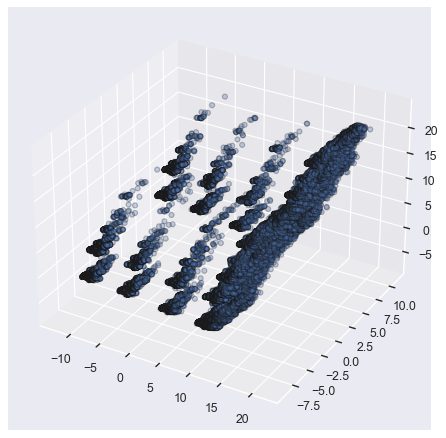

In [10]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], alpha = 0.3, edgecolor = "k");

In [11]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = new_df.values
Y = df['dup_rows_count'].values

predicted_kmeans = kmeans.fit_predict(X, sample_weight = Y)

Wall time: 4.77 s


In [12]:
new_df['cluster'] = predicted_kmeans
new_df

,PC1,PC2,PC3,cluster
0,4.693122,9.352067,-6.172906,2
1,-9.669628,-8.084483,0.092799,0
2,-9.578410,-8.124393,0.081419,0
3,-9.734131,6.040841,6.886277,3
4,6.238325,-4.896521,-6.974035,1
...,...,...,...,...
606652,8.318310,9.663925,2.830572,2
606653,4.527971,9.308131,-6.058344,2
606654,12.479102,-4.428944,6.235098,4
606655,9.675347,-4.625363,-3.349686,1


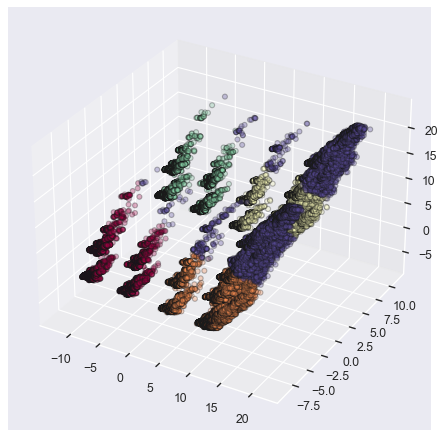

In [13]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [14]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.4920
Silhouette Coeff Score: 0.7183


# Methods 2

In [15]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(random_state = seed))
)

transformer

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('onehotencoder-1',
                                  OneHotEncoder(top_categories=4,
                                                variables=['emp_index'])),
                                 ('onehotencoder-2',
                                  OneHotEncoder(variables=['cust_gender',
                                                           'cust_rel_time',
                                                           'cust_residence'])),
                                 ('countfrequencyencoder',
                                  CountFrequencyEncoder(encoding_method='frequency',
                                                        variables=['name_province',
                                                                   'channel_to_join']))])),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=42)),
           

In [16]:
%%time
arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

print(arr.shape)
arr

(606657, 55)
Wall time: 12.2 s


array([[ 4.69312183e+00,  9.35206714e+00, -6.17291541e+00, ...,
         1.66963391e-15,  2.49847807e-14,  1.57859738e-13],
       [-9.66962841e+00, -8.08448286e+00,  9.28011725e-02, ...,
         1.97738488e-16,  1.74188430e-15,  3.36076062e-15],
       [-9.57840961e+00, -8.12439340e+00,  8.14187427e-02, ...,
        -3.64883544e-15, -2.79345675e-14, -5.70426461e-14],
       ...,
       [ 1.24791016e+01, -4.42894438e+00,  6.23509585e+00, ...,
        -7.89328821e-17,  2.12430784e-16, -5.50351330e-17],
       [ 9.67534715e+00, -4.62536306e+00, -3.34968628e+00, ...,
         2.01694016e-16, -2.51189936e-16,  2.92679382e-16],
       [ 6.75391679e+00,  9.69905007e+00, -3.23409992e+00, ...,
        -3.00685349e-17, -1.01457710e-16, -5.70382393e-16]])

In [17]:
np.sum(transformer.named_steps.pca.explained_variance_ratio_[:15])
#First 15 PCA has around 90# of explained variance

0.9053893652260661

In [18]:
chosen_pca = arr[:,:15]
chosen_pca.shape

(606657, 15)

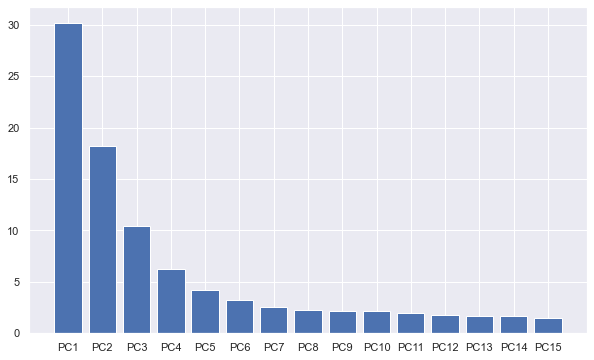

In [19]:
per_var = np.round(transformer.named_steps.pca.explained_variance_ratio_[:15] * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.figure(figsize = (10,6))
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels);

In [20]:
chosen_pca

array([[ 4.69312183,  9.35206714, -6.17291541, ...,  4.09955448,
        -0.17111314, -4.42412292],
       [-9.66962841, -8.08448286,  0.09280117, ...,  3.3157298 ,
         6.29462054,  5.62024078],
       [-9.57840961, -8.1243934 ,  0.08141874, ..., -0.91795379,
        -0.20301286,  0.03162935],
       ...,
       [12.47910159, -4.42894438,  6.23509585, ..., -0.17984805,
        -0.28449257,  0.20870688],
       [ 9.67534715, -4.62536306, -3.34968628, ...,  4.29654248,
         5.54715439,  5.81833413],
       [ 6.75391679,  9.69905007, -3.23409992, ...,  1.49026656,
        -0.39124014, -0.90908003]])

In [21]:
%%time
kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = chosen_pca
Y = df['dup_rows_count'].values

predicted_kmeans = kmeans.fit_predict(X, sample_weight = Y)

Wall time: 7.25 s


In [22]:
new_df = pd.DataFrame(chosen_pca, columns=["PC" + str(x) for x in range(1,chosen_pca.shape[1] + 1)])
new_df['cluster'] = predicted_kmeans
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,cluster
0,4.693122,9.352067,-6.172915,-0.891644,-2.358724,-0.573232,-0.082493,-0.956685,0.615621,-4.202146,0.803676,0.598343,4.099554,-0.171113,-4.424123,3
1,-9.669628,-8.084483,0.092801,-3.279195,0.353404,-1.517223,0.385401,-0.216688,0.099587,2.163521,-0.323274,2.457676,3.315730,6.294621,5.620241,0
2,-9.578410,-8.124393,0.081419,-3.096922,0.642736,-1.357435,1.301861,-0.000054,-0.114925,2.121315,0.226494,-0.210618,-0.917954,-0.203013,0.031629,0
3,-9.734131,6.040841,6.886276,2.766004,-6.201746,0.772502,-1.534666,-1.640712,1.768357,2.255151,0.381509,-0.667289,0.594798,0.104095,-1.441325,4
4,6.238325,-4.896522,-6.974035,-3.632772,-2.030164,-2.979660,1.661910,0.926622,0.470811,1.802075,-0.578706,0.404131,-1.649240,-0.594611,0.657897,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,8.318310,9.663925,2.830572,0.382070,-4.705137,0.083738,-7.780857,-4.606065,1.222670,1.122833,-4.482818,-3.577883,-1.359930,-0.819304,0.807018,3
606653,4.527971,9.308131,-6.058346,-0.851413,-2.007641,-0.808360,-0.067482,0.629913,0.635694,0.884493,0.162174,0.591243,1.566437,-0.269551,-1.568005,3
606654,12.479102,-4.428944,6.235096,-2.819825,-3.679255,-3.847319,-3.565622,-4.746234,2.258933,1.597035,-2.598391,-3.621060,-0.179848,-0.284493,0.208707,2
606655,9.675347,-4.625363,-3.349686,-3.602889,2.542204,0.252589,-7.501709,-2.143761,-0.508110,0.875134,-4.746465,-0.225433,4.296542,5.547154,5.818334,1


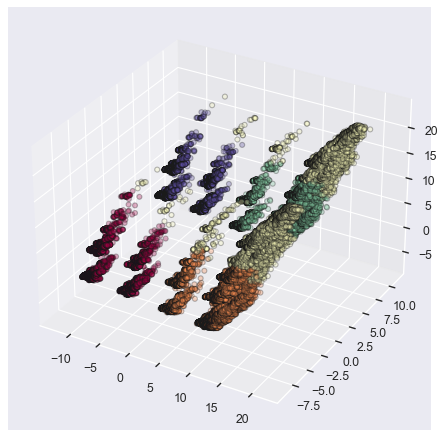

In [23]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [24]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 1.2382
Silhouette Coeff Score: 0.3555


# Method 3

In [25]:
tranf_df = col_transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))
tranf_df

,age,new_cust_index,cust_seniority,indrel,cust_type,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,...,cust_gender_V,cust_rel_time_A,cust_rel_time_I,cust_residence_Spain,cust_residence_NorthAmerica,cust_residence_Europe,cust_residence_Asia,cust_residence_Africa,cust_residence_SouthAmerica,cust_residence_Oceania
0,35,0.0,6,1.0,1.0,1,0,0.001182,0,0.027966,...,0,1,0,1,0,0,0,0,0,0
1,23,0.0,35,1.0,1.0,1,1,0.330650,0,0.009020,...,1,0,1,1,0,0,0,0,0,0
2,23,0.0,35,1.0,1.0,1,0,0.330650,0,0.009020,...,1,0,1,1,0,0,0,0,0,0
3,22,0.0,35,1.0,1.0,1,0,0.009495,0,0.025649,...,0,0,1,1,0,0,0,0,0,0
4,23,0.0,35,1.0,1.0,1,0,0.330650,0,0.025649,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,27,0.0,22,1.0,1.0,1,0,0.242509,0,0.331167,...,0,1,0,1,0,0,0,0,0,0
606653,56,0.0,22,1.0,1.0,1,0,0.242509,0,0.031204,...,0,1,0,1,0,0,0,0,0,0
606654,39,0.0,22,1.0,1.0,1,0,0.242509,0,0.031204,...,1,1,0,1,0,0,0,0,0,0
606655,36,0.0,22,1.0,1.0,1,1,0.242509,0,0.331167,...,1,1,0,1,0,0,0,0,0,0


In [26]:
arr = QuantileTransformer(output_distribution = "normal", random_state = seed).\
      fit_transform(tranf_df)

arr

array([[-0.21106976, -5.19933758, -2.87784612, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.02512268, -5.19933758, -0.40880512, ..., -5.19933758,
        -5.19933758, -5.19933758],
       ...,
       [-0.04769168, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.17527843, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.09549215, -5.19933758, -0.83555836, ..., -5.19933758,
        -5.19933758, -5.19933758]])

In [27]:
%%time
kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = arr
Y = df['dup_rows_count'].values

predicted_kmeans = kmeans.fit_predict(X, sample_weight = Y)

Wall time: 12.2 s


In [28]:
new_df_1 = pd.DataFrame(arr, columns = tranf_df.columns)
new_df_1

,age,new_cust_index,cust_seniority,indrel,cust_type,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,...,cust_gender_V,cust_rel_time_A,cust_rel_time_I,cust_residence_Spain,cust_residence_NorthAmerica,cust_residence_Europe,cust_residence_Asia,cust_residence_Africa,cust_residence_SouthAmerica,cust_residence_Oceania
0,-0.211070,-5.199338,-2.877846,5.199338,-5.199338,5.199338,-5.199338,-1.994971,-5.199338,-0.143512,...,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,-1.025123,-5.199338,-0.408805,5.199338,-5.199338,5.199338,5.199338,5.199338,-5.199338,-1.070745,...,5.199338,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,-1.025123,-5.199338,-0.408805,5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-1.070745,...,5.199338,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,-1.304121,-5.199338,-0.408805,5.199338,-5.199338,5.199338,-5.199338,-1.197193,-5.199338,-0.284828,...,-5.199338,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,-1.025123,-5.199338,-0.408805,5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-0.284828,...,5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606652,-0.507774,-5.199338,-0.835558,5.199338,-5.199338,5.199338,-5.199338,-0.593940,-5.199338,5.199338,...,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
606653,0.931971,-5.199338,-0.835558,5.199338,-5.199338,5.199338,-5.199338,-0.593940,-5.199338,-0.069056,...,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
606654,-0.047692,-5.199338,-0.835558,5.199338,-5.199338,5.199338,-5.199338,-0.593940,-5.199338,-0.069056,...,5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
606655,-0.175278,-5.199338,-0.835558,5.199338,-5.199338,5.199338,5.199338,-0.593940,-5.199338,5.199338,...,5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [29]:
pca = PCA(n_components=3, random_state = seed)

red_arr = pca.fit_transform(new_df_1)
red_arr

array([[ 4.69312183,  9.35206695, -6.17290551],
       [-9.6696284 , -8.08448292,  0.09279859],
       [-9.57840961, -8.12439338,  0.08141896],
       ...,
       [12.47910159, -4.42894441,  6.2350975 ],
       [ 9.67534716, -4.62536322, -3.34968638],
       [ 6.75391679,  9.69904997, -3.23409637]])

Total Variance Ratio: 58.759 %


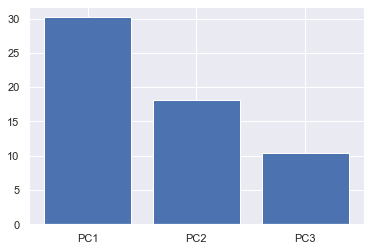

In [30]:
print(f"Total Variance Ratio: {np.sum(pca.explained_variance_ratio_)* 100:.3f} %")

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels);

In [31]:
new_df_2 = pd.DataFrame({
    "PC1" : red_arr[:,0],
    "PC2" : red_arr[:,1],
    "PC3" : red_arr[:,2]
})

new_df_2['cluster'] = predicted_kmeans
new_df_2

,PC1,PC2,PC3,cluster
0,4.693122,9.352067,-6.172906,1
1,-9.669628,-8.084483,0.092799,3
2,-9.578410,-8.124393,0.081419,3
3,-9.734131,6.040841,6.886277,0
4,6.238325,-4.896521,-6.974035,4
...,...,...,...,...
606652,8.318310,9.663925,2.830572,1
606653,4.527971,9.308131,-6.058344,1
606654,12.479102,-4.428944,6.235098,2
606655,9.675347,-4.625363,-3.349686,4


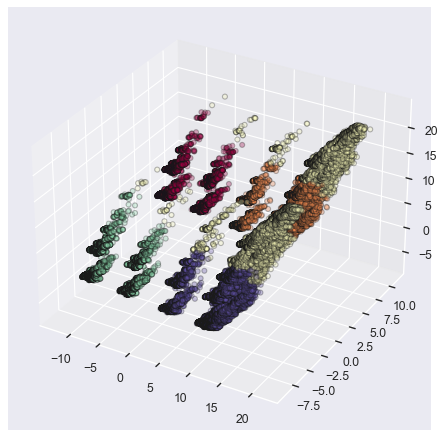

In [32]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df_2['PC1'], new_df_2['PC2'], new_df_2['PC3'], c = new_df_2['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [33]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df_1, new_df_2['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df_1, 
                                                            new_df_2['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 1.3918
Silhouette Coeff Score: 0.3137


# method 4

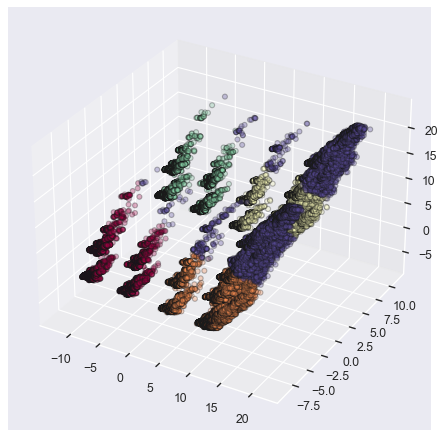

In [34]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = new_df.values
Y = df['dup_rows_count'].values

predicted_kmeans = kmeans.fit_predict(X, sample_weight = Y)

new_df['cluster'] = predicted_kmeans

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [35]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.4920
Silhouette Coeff Score: 0.7183


# method 5

In [36]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

In [37]:
%%time
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=5, random_state=seed, max_iter=1000)

X = new_df.values
Y = df['dup_rows_count'].values

predicted_kmeans =  mb_kmeans.fit_predict(X, sample_weight = Y)

Wall time: 6.14 s


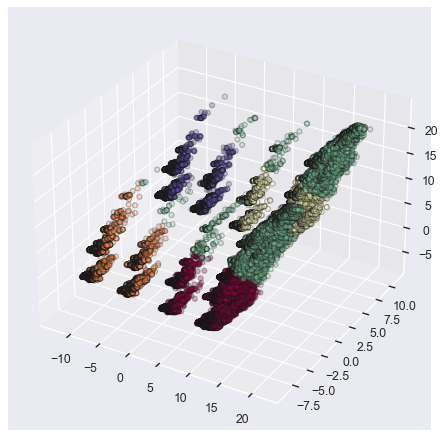

In [38]:
new_df['cluster'] = predicted_kmeans

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [39]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.4911
Silhouette Coeff Score: 0.7183


# method 6, GMM Algorithm

In [40]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

arr = transformer.fit_transform(df)

new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

In [41]:
%%time
from sklearn.mixture import GaussianMixture

parameters=['full','tied','diag','spherical']

X = new_df.values

results_ = pd.DataFrame(columns=['Covariance Type', 'Silhouette Score','Davies Bouldin Score'])

for i in parameters:
    gmm_cluster = GaussianMixture(n_components=5,covariance_type=i,random_state = seed)
    clusters = gmm_cluster.fit_predict(X)

    results_ = results_.append({
        "Covariance Type" : i, 
        
        "Silhouette Score" : metrics.silhouette_score(X, 
                                                      clusters, 
                                                      sample_size = 30000, 
                                                      random_state = seed),
        
        'Davies Bouldin Score' : metrics.davies_bouldin_score(X, clusters)
    }, ignore_index=True)

results_.sort_values("Silhouette Score", ascending=False)

Wall time: 1min 16s


,Covariance Type,Silhouette Score,Davies Bouldin Score
2,diag,0.718070,0.497657
0,full,0.717317,0.494505
1,tied,0.688378,0.513069
3,spherical,0.401572,1.004295


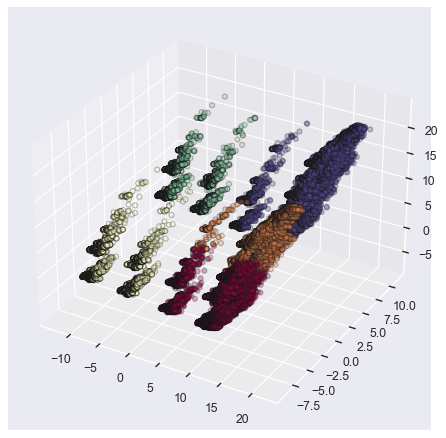

In [42]:
gmm_cluster = GaussianMixture(n_components=5, covariance_type = "tied", random_state = seed)
cluster = gmm_cluster.fit_predict(X)

new_df['cluster'] = cluster

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

# method 6 meanshift

In [43]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

arr = transformer.fit_transform(df)

new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

In [44]:
%%time
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

X = new_df.values

est_bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples = 30000, random_state = seed)

mean_shift = MeanShift(bandwidth = est_bandwidth, 
                       bin_seeding = True, 
                       max_iter = 1000,
                       n_jobs = -1).fit_predict(X)

labels_unique = np.unique(mean_shift)
n_clusters_=len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 6
Wall time: 1min 15s


Silhouette Score for MeanShift:0.734
Davies Bouldin Score for MeanShift:0.425


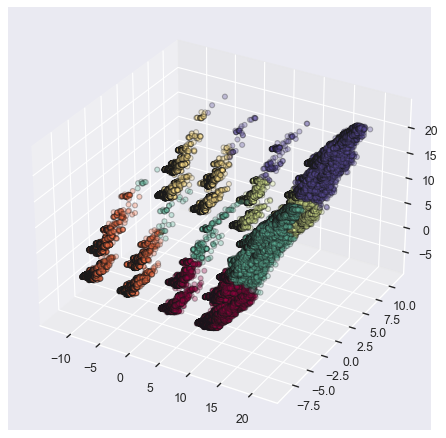

In [45]:
print('Silhouette Score for MeanShift:'+str(metrics.silhouette_score(X, 
                                                                     mean_shift, 
                                                                     sample_size = 30000, 
                                                                     random_state = seed).round(3)))

print('Davies Bouldin Score for MeanShift:'+str(metrics.davies_bouldin_score(X, mean_shift).round(3)))

new_df['cluster'] = mean_shift

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

# method 7 - fuzzy c means

In [46]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed)),
    (PCA(n_components = 3, random_state = seed))
)

arr = transformer.fit_transform(df)

new_df = pd.DataFrame({
    "PC1" : arr[:,0],
    "PC2" : arr[:,1],
    "PC3" : arr[:,2]
})

Wall time: 17.8 s


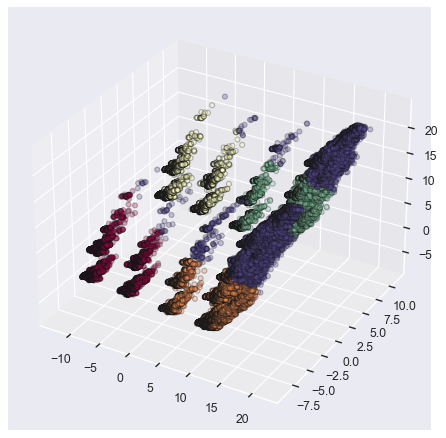

In [47]:
%%time
from fcmeans import FCM

X = new_df.values

fcm = FCM(n_clusters = 5, random_state = seed)

fcm.fit(X)
fcm_labels = fcm.predict(X)

new_df['cluster'] = fcm_labels

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['PC1'], new_df['PC2'], new_df['PC3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [48]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")
print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.4866
Silhouette Coeff Score: 0.7175


# method 8

In [49]:
transformer = make_pipeline(
    (col_transformer), 
    (QuantileTransformer(output_distribution = "normal", random_state = seed))
)

arr = transformer.fit_transform(df.drop(["dup_rows_count"], axis = 1))

In [50]:
%%time
from tensorflow import keras

nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(12, input_shape=[arr.shape[1]], activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
])

nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(9, input_shape=[3], activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(arr.shape[1], activation='relu'),
])

nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(optimizer = "adam", loss = "mean_squared_error")
nl_st_autoencoder.summary()


history = nl_st_autoencoder.fit(arr,arr, epochs=100,
                                callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

labels = nl_st_encoder.predict(arr)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 3)                 819       
_________________________________________________________________
sequential_1 (Sequential)    (None, 55)                871       
Total params: 1,690
Trainable params: 1,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18959/18959 [==============================] - 17s 787us/step - loss: 20.2461
Epoch 2/100
18959/18959 [==============================] - 16s 849us/step - loss: 19.5415
Epoch 3/100
18959/18959 [==============================] - 17s 918us/step - loss: 19.5365
Epoch 4/100
18959/18959 [==============================] - 18s 925us/step - loss: 19.5339
Epoch 5/100
18959/18959 [==============================] - 18s 946us/step - loss: 19.5340
Epoch 6/100
18959/18959 [==============================] - 19s 9

18959/18959 [==============================] - 18s 930us/step - loss: 19.5273
Epoch 38/100
18959/18959 [==============================] - 18s 929us/step - loss: 19.5272
Epoch 39/100
18959/18959 [==============================] - 18s 951us/step - loss: 19.5252
Epoch 40/100
18959/18959 [==============================] - 17s 912us/step - loss: 19.5252
Epoch 41/100
18959/18959 [==============================] - 17s 905us/step - loss: 19.5245
Epoch 42/100
18959/18959 [==============================] - 17s 889us/step - loss: 19.5271
Epoch 43/100
18959/18959 [==============================] - 17s 874us/step - loss: 19.5286
Epoch 44/100
18959/18959 [==============================] - 17s 892us/step - loss: 19.5288
Epoch 45/100
18959/18959 [==============================] - 17s 896us/step - loss: 19.5314
Epoch 46/100
18959/18959 [==============================] - 17s 876us/step - loss: 19.5264
Epoch 47/100
18959/18959 [==============================] - 16s 869us/step - loss: 19.5262
Epoch 48/100

18959/18959 [==============================] - 17s 886us/step - loss: 19.5250
Epoch 77/100
18959/18959 [==============================] - 17s 878us/step - loss: 19.5234
Epoch 78/100
18959/18959 [==============================] - 18s 957us/step - loss: 19.5247
Epoch 79/100
18959/18959 [==============================] - 19s 986us/step - loss: 19.5224
Epoch 80/100
18959/18959 [==============================] - 17s 905us/step - loss: 19.5237
Epoch 81/100
18959/18959 [==============================] - 17s 876us/step - loss: 19.5244
Epoch 82/100
18959/18959 [==============================] - 17s 882us/step - loss: 19.5239
Epoch 83/100
18959/18959 [==============================] - 16s 868us/step - loss: 19.5228
Epoch 84/100
18959/18959 [==============================] - 17s 904us/step - loss: 19.5255
Epoch 85/100
18959/18959 [==============================] - 17s 886us/step - loss: 19.5265
Epoch 86/100
18959/18959 [==============================] - 16s 865us/step - loss: 19.5232
Epoch 87/100

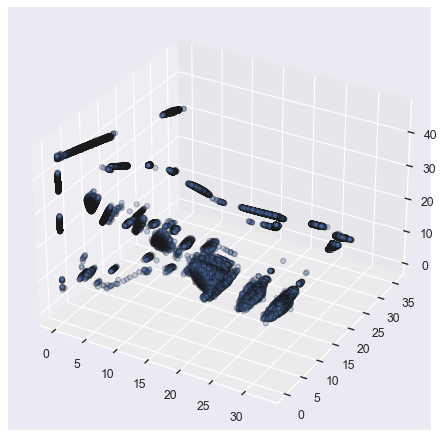

In [54]:
new_df = pd.DataFrame({
    "dim1" : labels[:,0],
    "dim2" : labels[:,1],
    "dim3" : labels[:,2]
})

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['dim1'], new_df['dim2'], new_df['dim3'], alpha = 0.3, edgecolor = "k");

In [55]:
kmeans = KMeans(n_clusters=5, random_state=seed, max_iter=1000)
X = new_df.values
Y = df['dup_rows_count'].values

predicted_kmeans = kmeans.fit_predict(X, sample_weight = Y)

new_df['cluster'] = predicted_kmeans
new_df

,dim1,dim2,dim3,cluster
0,25.124250,14.285335,30.465061,2
1,0.000000,8.714500,42.216148,1
2,0.000000,8.153515,42.461990,1
3,5.881225,0.000000,36.628521,1
4,27.508942,29.611013,9.222519,0
...,...,...,...,...
606652,26.563955,5.495658,18.378769,2
606653,24.947401,14.449647,30.228781,2
606654,26.021122,17.204687,2.543917,3
606655,30.424541,24.911543,17.328926,0


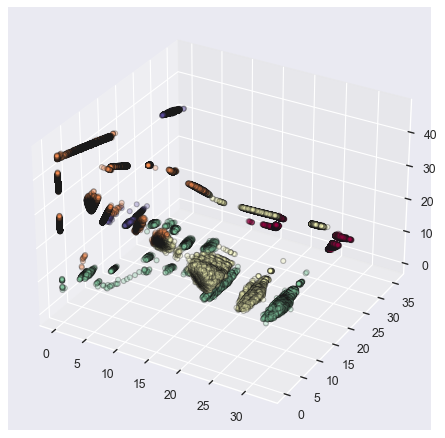

In [56]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['dim1'], new_df['dim2'], new_df['dim3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [57]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")

print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.6074
Silhouette Coeff Score: 0.6304


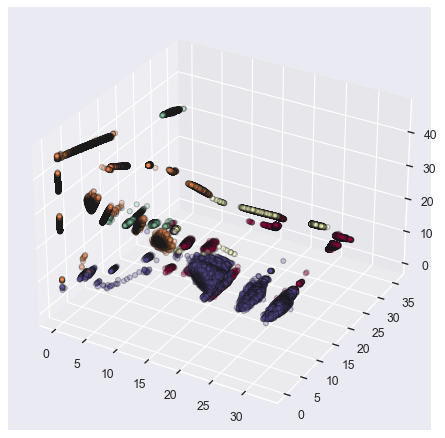

In [58]:
gmm_cluster = GaussianMixture(n_components=5, covariance_type = "tied", random_state = seed)
cluster = gmm_cluster.fit_predict(X)

new_df['cluster'] = cluster

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k');
ax = plt.axes(projection="3d");

ax.scatter3D(new_df['dim1'], new_df['dim2'], new_df['dim3'], c = new_df['cluster'], 
             alpha = 0.3, edgecolor = "k", cmap = 'Spectral');

In [59]:
print(f"Davies-Bouldin score: {metrics.davies_bouldin_score(new_df.iloc[:, :-1], new_df['cluster']):.4f}")

print(f"""Silhouette Coeff Score: {metrics.silhouette_score(new_df.iloc[:, :-1], 
                                                            new_df['cluster'], 
                                                            sample_size = 30000, 
                                                            random_state = seed):.4f}""")

Davies-Bouldin score: 0.5852
Silhouette Coeff Score: 0.6240


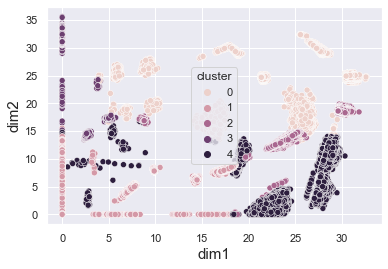

In [61]:
sns.scatterplot(x = 'dim1', y = 'dim2', data = new_df, hue = 'cluster');